# Chapter 4. Feature engineering and Represeting data.
# Part 5. Automatic Feature Selection.
It's useful in to select the most valuable features to keep model away from being too complex.

There are 3 methods to do so:

1) Univariate statistics

2) Model-based selection

3) Iterative selection

## - Univariate Statistics
Method finds and selects features that have the highest bond with Y by themselves only (i.e. univariative).

There are 2 methods options:

1) 'f_classif' for classification (used by default)

2) 'f_regression' for regression

Features excluding processing:

1) 'SelectPercentile' by given percent

2) 'SelectKB' by given number

The task: Restore vanilla featurespace from modified featurespace that was made by adding random features to vanilla ones.

Preparations:

In [28]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

cancer = load_breast_cancer()

#random features generation
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

#concatenation of vanilla featurespace and random one
X_w_noise = np.hstack([cancer.data, noise])

#splitting gain dataset
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=0.5)

Applying feature excluding:

X_train shape: (284, 80)
X_train_selected shape: (284, 40)
[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'feature index')

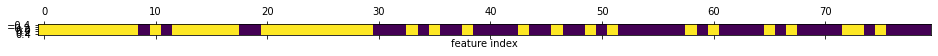

In [27]:
#-----initialization, building and applying excluder
#'f_classif' (as default) and 'SelectPercentile' (50%)
select = SelectPercentile(percentile=50).fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print('X_train shape: {}'.format(X_train.shape))
print('X_train_selected shape: {}'.format(X_train_selected.shape))

#-----selected features visualization
#'get_support()' shows booleanly selected and excluded features
mask = select.get_support()
print(mask)
#visualization
plt.matshow(mask.reshape(1,-1))
plt.xlabel('feature index')

^ The most random features were excluded (quality though isn't great)

Comparison of models accuracies fitted on modified featurespace and selected featurespace:

In [29]:
X_test_selected = select.transform(X_test)

lr1 = LogisticRegression().fit(X_train, y_train)
print('Modified featurespace accuracy: {}'.format(lr1.score(X_test, y_test)))
lr2 = LogisticRegression().fit(X_train_selected, y_train)
print('Selected featurespace accuracy: {}'.format(lr2.score(X_test_selected, y_test)))

Modified featurespace accuracy: 0.9192982456140351
Selected featurespace accuracy: 0.9157894736842105


/home/akado/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/akado/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

^ According to book it supposed to be increasing accuracy but sklearn had some updates since the book was written.